<a href="https://colab.research.google.com/github/DanieleScal99/MLPNS_DScalabrini/blob/main/kNN_DScalabrini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy.spatial.distance import cdist
#c-dist è la funzione che calcola distanza da un punto a tutti gli altri punti; 


In [2]:
#vogliamo creare un dataset completamente artificiale; 
np.random.seed(166)
data = np.random.randn(100, 2)
#abbiamo creato un dataset bidimensionale, come quello nelle slide; 
#ora che ho il feature space devo creare la label; 
labels = np.random.randint(0, 2, 100)
labels

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

Text(0, 0.5, 'y')

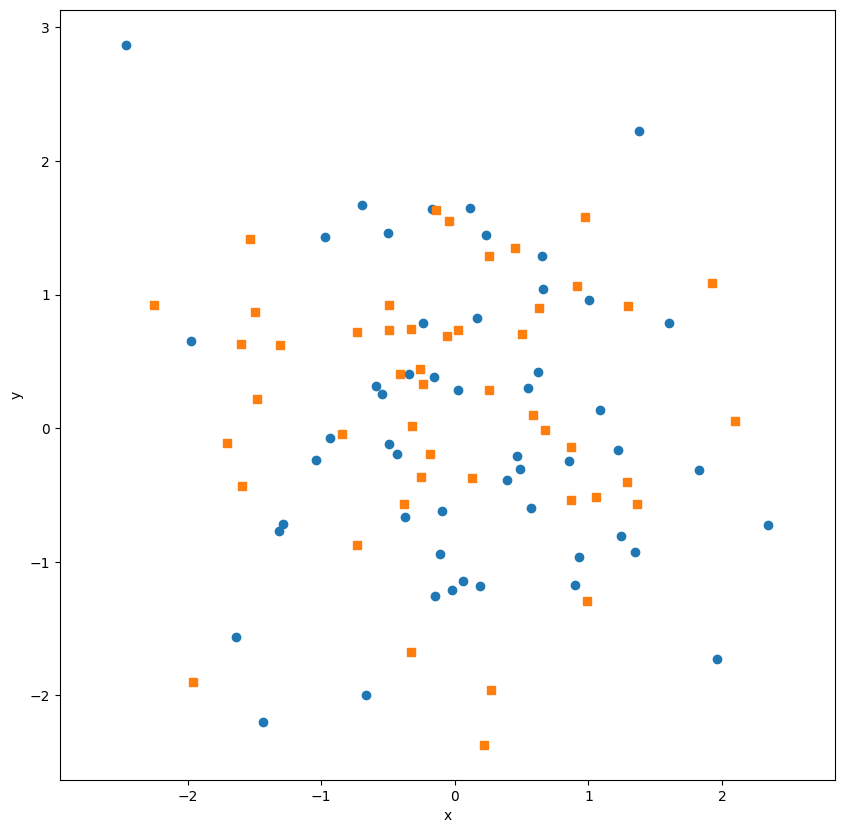

In [3]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis('equal')

ax.plot(data[:,0][labels==0], data[:,1][labels==0],'o')
ax.plot(data[:,0][labels==1], data[:,1][labels==1],'s')

ax.set_xlabel('x')
ax.set_ylabel('y')
#abbiamo plottato il nostro feature space; 

In [4]:
#Ora creiamo una test particle, ovvero un punto che mettiamo a caso nel feature space 
#e vediamo come sarebbe classificato dal kNN in base al numero k che decido.
testparticle = np.random.randn(2)
testparticle 
 

array([0.65074331, 0.72586895])

Text(0, 0.5, 'y')

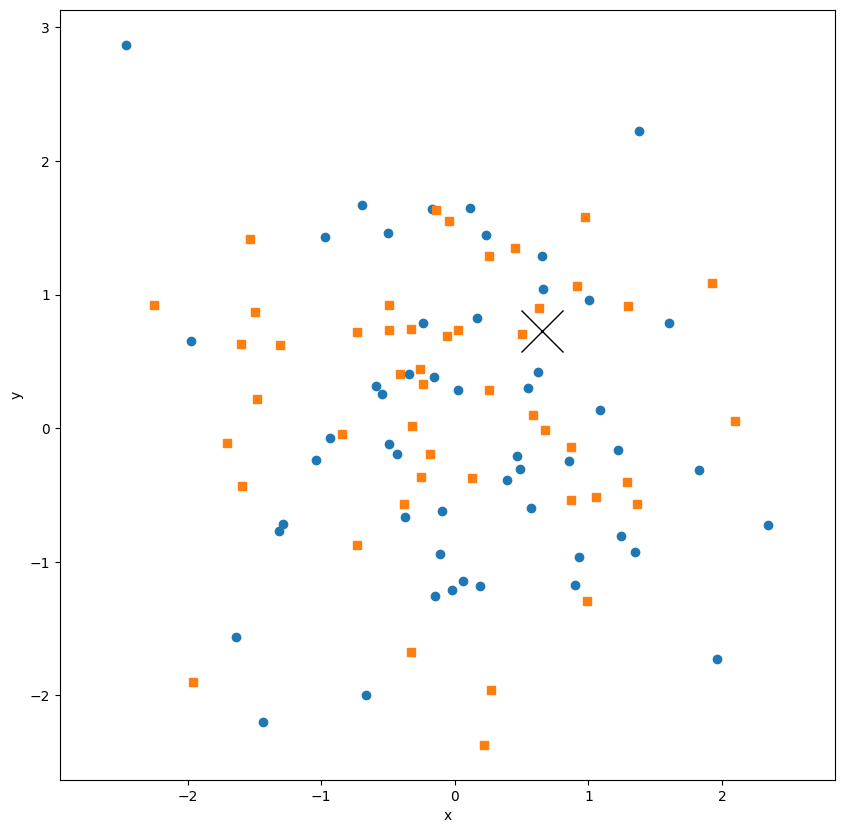

In [5]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis('equal')

ax.plot(data[:,0][labels==0], data[:,1][labels==0],'o')
ax.plot(data[:,0][labels==1], data[:,1][labels==1],'s')
ax.plot(testparticle[0], testparticle[1], 'kx', ms=30, lw=3)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [6]:
#Ora vado a creare un k nearest neighbour classifier. Prima però devo 
#calcolare la distanza della mia particella da tutti gli altri punti.
#In questo modo saprò chi sono i primi vicini, i secondi vicini ecc...
#Per calcolare questa distanza useremo la funzione cdist. 
d=cdist(np.atleast_2d(testparticle), data)
d
d.shape
#ho la distanza euclidea tra la mia particella e gli altri punti; 

(1, 100)

In [7]:
np.min(d), d[:, np.argmin(d)]

(0.14700769103038863, array([0.14700769]))

In [8]:
k = 1 #iperparametro; 
labeltest = labels[np.argmin(d)]

<ipython-input-9-61f75a65a21a>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0], testparticle[1], 'kx', ms=30, lw=3, color=colors[labeltest])


Text(0, 0.5, 'y')

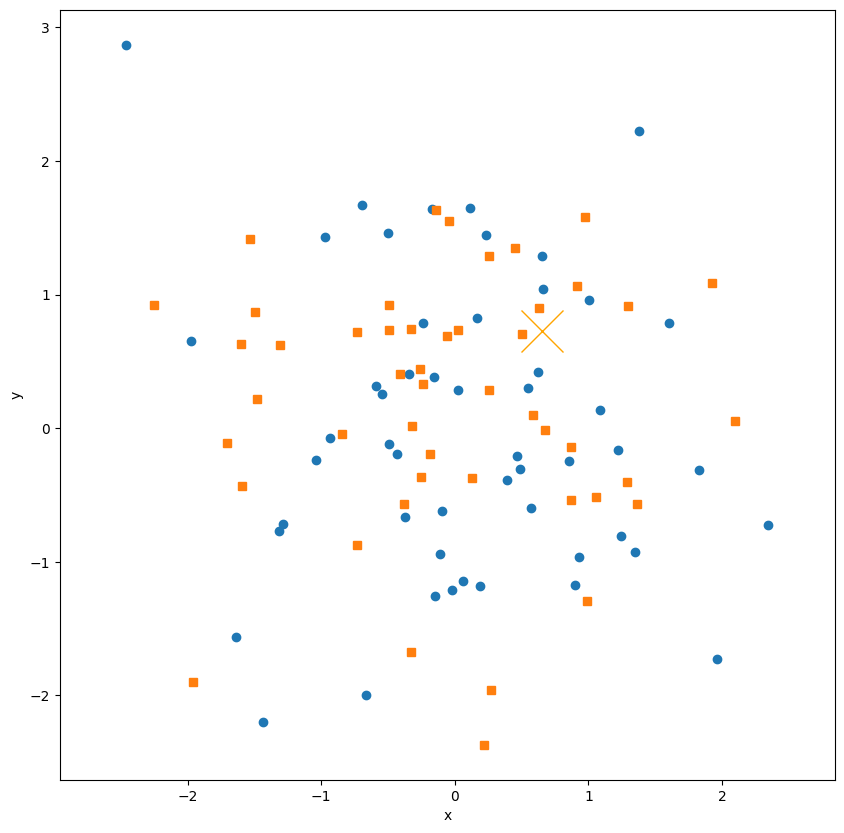

In [9]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis('equal')

colors = ['blue', 'orange']
ax.plot(data[:,0][labels==0], data[:,1][labels==0],'o')
ax.plot(data[:,0][labels==1], data[:,1][labels==1],'s')
ax.plot(testparticle[0], testparticle[1], 'kx', ms=30, lw=3, color=colors[labeltest])
ax.set_xlabel('x')
ax.set_ylabel('y')

#quindi la mia particella è arancione perchè la particella più vicina é
#arancione. 

In [10]:
k=5 
#ora aumentiamo il numero di primi vicini a 5. Ricordo che k è un iperparametro
#del nostro algoritmo. 
np.argsort(d)
#argsort ordina l'array d ( ritorna un array di indici)

array([[ 8, 45, 71, 97, 18, 50, 21, 25, 85, 56, 53, 78,  1, 15, 90, 99,
        51, 49, 74, 33, 40, 83, 24, 46, 95, 27,  2, 81, 30, 36, 91, 76,
        14, 68, 66, 70, 87, 79, 28, 94, 84, 93, 75, 67,  0, 44, 54,  6,
        92, 88,  5, 57, 89, 34, 35, 98, 37, 61, 63, 96, 55, 52, 13, 69,
        60, 59, 20, 77, 10, 26,  4, 22, 32, 38, 62, 58, 29, 65,  7, 82,
        42, 16, 43, 19, 48, 80, 17,  3,  9, 39, 47, 11, 72, 86, 23, 12,
        73, 31, 41, 64]])

In [13]:
nns = data[np.argsort(d)][0][:k]
#ricordo che data ha dimensione (2,100)
#In questo modo ho selezionato i nearest neighbours

In [15]:
nnslabel=labels[np.argsort(d)][0][:k] 
nnslabel

array([1, 1, 0, 0, 0])

In [18]:
labeltest2 = 0 if (nnslabel == 0).sum() > (nnslabel == 1).sum() else 1
(nnslabel == 0)
#questo mi ritorna un boolean array
#Nel momento in cui faccio .sum() i true vengono visti come 1 e i false come 0; 

array([False, False,  True,  True,  True])

<ipython-input-21-eff887424501>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0], testparticle[1], 'kx', ms=30, lw=3, color=colors[labeltest2])


Text(0, 0.5, 'y')

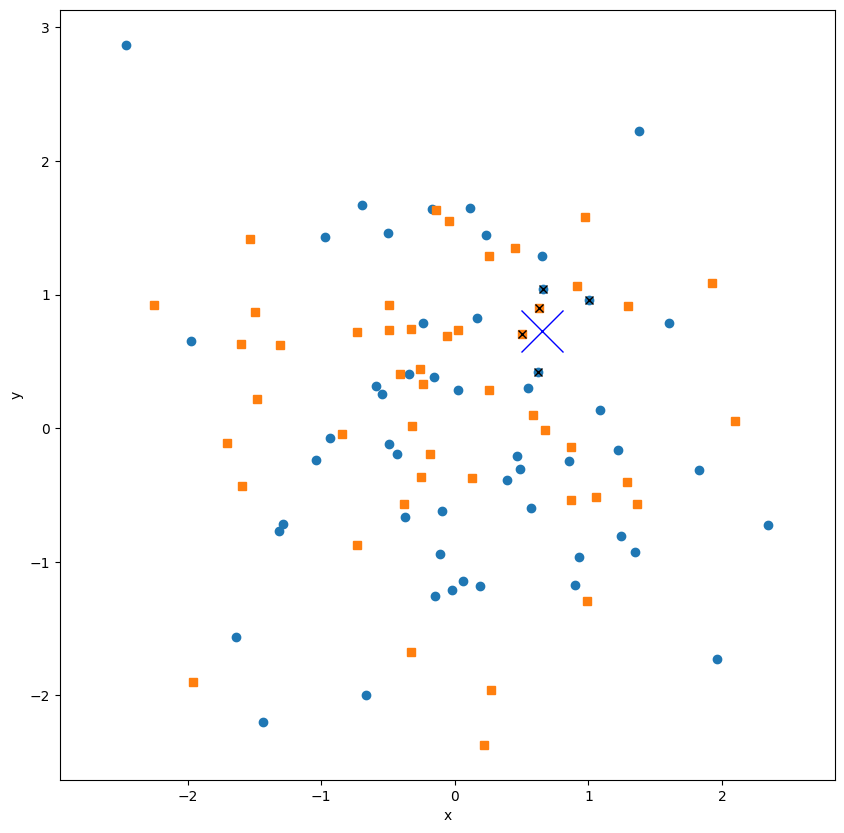

In [21]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis('equal')

colors = ['blue', 'orange']
ax.plot(data[:,0][labels==0], data[:,1][labels==0],'o')
ax.plot(data[:,0][labels==1], data[:,1][labels==1],'s')
ax.plot(testparticle[0], testparticle[1], 'kx', ms=30, lw=3, color=colors[labeltest2])
ax.plot(nns[:,0], nns[:,1], 'kx')
ax.set_xlabel('x')
ax.set_ylabel('y')